
**Introduction**:


*   Current process
*   Challenges





**Dataset**

Source - Employment Scam Aegean Dataset (EMSCAD)
Number of rows - 17,880
It consists of Fraudulent and legitamate job listings


*   Legitimate - 17014
*   Fraudulent - 866



In [ ]:
!pip install beautifulsoup4

In [ ]:
import pandas as pd
import nltk
import string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/NLP/DataSet.csv'
file_path_local = '/content/DataSet.csv'
df = pd.read_csv(file_path)
df = df[['title', 'company_profile', 'description', 'has_company_logo', 'fraudulent']]
#df.head

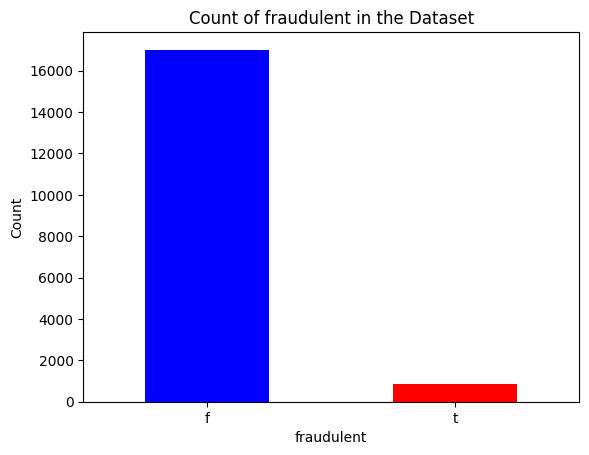

In [ ]:
column_name = 'fraudulent'

column_counts = df[column_name].value_counts()


column_counts.plot(kind='bar', rot=0, color=['blue', 'red'])


plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Count of {column_name} in the Dataset')


plt.show()

**Data Preprocessing:-**

Removing HTML tags in the dataset columns


In [ ]:
# Removing HTML tags in the dataset columns
df['description'] = df['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df['company_profile'] = df['company_profile'].astype(str).apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df.head

<bound method NDFrame.head of                                                    title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Ou

In [ ]:
count = df['fraudulent'].value_counts()
print(count[0])
print(count[1])


17014
866


In [ ]:
#separating labels for balancing dataset
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

Balancing the dataset

In [ ]:
df['fraudulent'] = df['fraudulent'].map({'t': 1, 'f': 0})
df.head

<bound method NDFrame.head of                                                    title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Ou

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
count = df['fraudulent'].value_counts()
print(count[0])
print(count[1])


17014
866


Undersampling

In [ ]:
# import library
from collections import Counter
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

df = pd.DataFrame(x_rus,columns=x.columns)
df['fraudulent'] = y_rus

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({'f': 17014, 't': 866})
Resample dataset shape Counter({'f': 866, 't': 866})


Oversampling



In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

df = pd.DataFrame(x_ros,columns=x.columns)
df['fraudulent'] = y_ros
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'f': 17014, 't': 866})
Resample dataset shape Counter({'f': 17014, 't': 17014})


In [ ]:
df.head

<bound method NDFrame.head of                                            title  \
0                               Marketing Intern   
1      Customer Service - Cloud Video Production   
2        Commissioning Machinery Assistant (CMA)   
3              Account Executive - Washington DC   
4                            Bill Review Manager   
...                                          ...   
34023                    Online Typist From Home   
34024                  Administrative Assitstant   
34025                               QC Inspector   
34026                    Fraud Detection Analyst   
34027            Sales Professional- Mid Market    

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global H

Weighted loss

In [ ]:

def compute_class_weight(train_y):
    """
    Compute class weight given imbalanced training data
    Usually used in the neural network model to augment the loss function (weighted loss function)
    Favouring/giving more weights to the rare classes.
    """
    import sklearn.utils.class_weight as scikit_class_weight

    class_list = list(set(train_y))
    class_weight_value = scikit_class_weight.compute_class_weight(class_weight ='balanced', classes = class_list, y = train_y)
    class_weight = dict()

    # Initialize all classes in the dictionary with weight 1
    curr_max = int(np.max(class_list))
    for i in range(curr_max):
        class_weight[i] = 1

    # Build the dictionary using the weight obtained the scikit function
    for i in range(len(class_list)):
        class_weight[class_list[i]] = class_weight_value[i]

    return class_weight

In [ ]:
import numpy as np
weights = compute_class_weight(df['fraudulent'])
print(weights)

UFuncTypeError: ignored

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
import torch
from sklearn.utils import class_weight
import torch.nn as nn

weight_list = []
for key, weight in weights.items():
    weight_list.append(weight)
weight_tensor = torch.FloatTensor(weight_list)

# with weights
loss_fn = nn.CrossEntropyLoss(weight=weight_tensor).to(device)

In [ ]:
print(loss_fn.weight)

In [ ]:
df.shape

(17880, 5)

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert tokens to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a cleaned sentence
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
# Tokenizing dataset columns
df['description'] = df['description'].apply(preprocess_text)
df['company_profile'] = df['company_profile'].apply(preprocess_text)
#df.head

In [ ]:
# Feature Engineering
# Num of words per review title
df['company_profile_num_words'] = df['company_profile'].apply(lambda x:len(x.split()))
df['description_num_words'] = df['description'].apply(lambda x:len(x.split()))
#print(df['company_profile_num_words'].head)
#print(df['description_num_words'].head)

In [ ]:
# Get Parts of speech
def get_pos_counts(text):
  count_noun, count_verb, count_adj = 0, 0, 0
  words = word_tokenize(text)
  pos_tags = pos_tag(words)
  for word, tag in pos_tags:
    if tag.startswith('N'):
      count_noun += 1
    elif tag.startswith('V'):
      count_verb += 1
    elif tag.startswith('J'):
      count_adj += 1
  return count_noun, count_verb, count_adj

df[['company_profile_noun', 'company_profile_verb', 'company_profile_adj']] = df['company_profile'].apply(get_pos_counts).apply(pd.Series)
df[['description_noun', 'description_verb', 'description_adj']] = df['description'].apply(get_pos_counts).apply(pd.Series)
#print(df[['company_profile_noun', 'company_profile_verb', 'company_profile_adj']].head)
#print(df[['description_noun', 'description_verb', 'description_adj']].head)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
# Unigrams
def uni_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

# Bigrams
def bi_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

# Trigrams
def tri_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

In [ ]:
# Unigrams and Bigrams
def uni_bi_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

# Bigrams and Trigrams
def bi_tri_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 3))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

# Unigrams, Bigrams and trigrams
def uni_bi_tri_features(data):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 3))
  sparse_matrix = vectorizer.fit_transform(data)
  return sparse_matrix.getnnz(axis=1)

In [ ]:
df['company_profile_unigram'] = uni_features(df['company_profile'])
df['company_profile_bigram'] = bi_features(df['company_profile'])
df['company_profile_trigram'] = tri_features(df['company_profile'])
df['company_profile_uni_and_bi'] = uni_bi_features(df['company_profile'])
df['company_profile_bi_and_tri'] = bi_tri_features(df['company_profile'])
df['company_profile_uini_bi_tri'] = uni_bi_tri_features(df['company_profile'])

In [ ]:
df['description_unigram'] = uni_features(df['description'])
df['description_bigram'] = bi_features(df['description'])
df['description_trigram'] = tri_features(df['description'])
df['description_uni_and_bi'] = uni_bi_features(df['description'])
df['description_bi_and_tri'] = bi_tri_features(df['description'])
df['description_uini_bi_tri'] = uni_bi_tri_features(df['description'])

In [ ]:
df.head

<bound method NDFrame.head of                                                    title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      're food52 've created groundbreaking award-wi...   
1      90 seconds worlds cloud video production servi...   
2      valor services provides workforce solutions me...   
3      pa

In [ ]:
#converting values to int
df['has_company_logo'] = df['has_company_logo'].map({'t': 1, 'f': 0})


In [ ]:
df1 = df
df1.head

<bound method NDFrame.head of                                                    title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      're food52 've created groundbreaking award-wi...   
1      90 seconds worlds cloud video production servi...   
2      valor services provides workforce solutions me...   
3      pa

In [ ]:
y = df['fraudulent']
df.drop('fraudulent', axis=1, inplace=True)
x = df

In [ ]:
#Splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Naive Bayes Without OverSampling on Raw dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from scipy.sparse import hstack, csr_matrix

# Combine the text data for fitting the vectorizer
combined_text_train = x_train['title'] + " " + x_train['company_profile'] + " " + x_train['description']
combined_text_test = x_test['title'] + " " + x_test['company_profile'] + " " + x_test['description']

# Initialize a single vectorizer for both train and test data
vectorizer = TfidfVectorizer()

# Fit and transform on the combined training text
X_train_transformed = vectorizer.fit_transform(combined_text_train)

# Only transform the test data using the vocabulary learned from the training data
X_test_transformed = vectorizer.transform(combined_text_test)

train_description_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_description_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_logo_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_logo_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_unigram_description = x_train['description_bi_and_tri'].values.reshape(-1,1)
test_unigram_description = x_test['description_bi_and_tri'].values.reshape(-1,1)

train_unigram_company_profile = x_train['company_profile_bi_and_tri'].values.reshape(-1,1)
test_unigram_company_profile = x_test['company_profile_bi_and_tri'].values.reshape(-1,1)

X_train_1 = hstack([X_train_transformed, x_train['company_profile_num_words'].values.reshape(-1,1),train_description_reshaped,train_logo_reshaped,train_unigram_description,train_unigram_company_profile])
X_test_1 = hstack([X_test_transformed, x_test['company_profile_num_words'].values.reshape(-1,1),test_description_reshaped,test_logo_reshaped,test_unigram_description,test_unigram_company_profile])

# Train your model using the transformed data
model_NB = MultinomialNB()
model_NB.fit(X_train_1, y_train)

# Predict using the test data
y_pred_NB = model_NB.predict(X_test_1)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_NB))
print(report)


Confusion Matrix:
[[2707  688]
 [  44  137]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3395
           1       0.17      0.76      0.27       181

    accuracy                           0.80      3576
   macro avg       0.58      0.78      0.58      3576
weighted avg       0.94      0.80      0.85      3576



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import confusion_matrix

# Combine the text data for fitting the vectorizer
combined_text_train = x_train['title'] + " " + x_train['company_profile'] + " " + x_train['description']
combined_text_test = x_test['title'] + " " + x_test['company_profile'] + " " + x_test['description']

# Initialize a single vectorizer for both train and test data
vectorizer = TfidfVectorizer()

# Fit and transform on the combined training text
X_train_transformed = vectorizer.fit_transform(combined_text_train)

# Only transform the test data using the vocabulary learned from the training data
X_test_transformed = vectorizer.transform(combined_text_test)

train_description_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_description_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_logo_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_logo_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_unigram_description = x_train['description_bi_and_tri'].values.reshape(-1,1)
test_unigram_description = x_test['description_bi_and_tri'].values.reshape(-1,1)

train_unigram_company_profile = x_train['company_profile_bi_and_tri'].values.reshape(-1,1)
test_unigram_company_profile = x_test['company_profile_bi_and_tri'].values.reshape(-1,1)

X_train_1 = hstack([X_train_transformed, x_train['company_profile_num_words'].values.reshape(-1,1),train_description_reshaped,train_logo_reshaped,train_unigram_description,train_unigram_company_profile])
X_test_1 = hstack([X_test_transformed, x_test['company_profile_num_words'].values.reshape(-1,1),test_description_reshaped,test_logo_reshaped,test_unigram_description,test_unigram_company_profile])

# Train your model using the transformed data
model_NB = MultinomialNB()
model_NB.fit(X_train_1, y_train)

# Predict using the test data
y_pred_NB = model_NB.predict(X_test_1)

# Evaluate the model's performance
report = classification_report(y_test, y_pred_NB, zero_division=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_NB))
print(report)


Confusion Matrix:
[[2280 1116]
 [ 747 2663]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3396
           1       0.70      0.78      0.74      3410

    accuracy                           0.73      6806
   macro avg       0.73      0.73      0.73      6806
weighted avg       0.73      0.73      0.73      6806



Undersampling - Naive Bayes

In [ ]:
# Combine the text data for fitting the vectorizer
combined_text_train = x_train['title'] + " " + x_train['company_profile'] + " " + x_train['description']
combined_text_test = x_test['title'] + " " + x_test['company_profile'] + " " + x_test['description']

# Initialize a single vectorizer for both train and test data
vectorizer = TfidfVectorizer()

# Fit and transform on the combined training text
X_train_transformed = vectorizer.fit_transform(combined_text_train)

# Only transform the test data using the vocabulary learned from the training data
X_test_transformed = vectorizer.transform(combined_text_test)

train_description_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_description_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_logo_reshaped = x_train['description_num_words'].values.reshape(-1,1)
test_logo_reshaped = x_test['description_num_words'].values.reshape(-1,1)

train_unigram_description = x_train['description_bi_and_tri'].values.reshape(-1,1)
test_unigram_description = x_test['description_bi_and_tri'].values.reshape(-1,1)

train_unigram_company_profile = x_train['company_profile_bi_and_tri'].values.reshape(-1,1)
test_unigram_company_profile = x_test['company_profile_bi_and_tri'].values.reshape(-1,1)

X_train_1 = hstack([X_train_transformed, x_train['company_profile_num_words'].values.reshape(-1,1),train_description_reshaped,train_logo_reshaped,train_unigram_description,train_unigram_company_profile])
X_test_1 = hstack([X_test_transformed, x_test['company_profile_num_words'].values.reshape(-1,1),test_description_reshaped,test_logo_reshaped,test_unigram_description,test_unigram_company_profile])

# Train your model using the transformed data
model_NB = MultinomialNB()
model_NB.fit(X_train_1, y_train)

# Predict using the test data
y_pred_NB = model_NB.predict(X_test_1)

# Evaluate the model's performance
report = classification_report(y_test, y_pred_NB, zero_division=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_NB))
print(report)

Confusion Matrix:
[[2707  688]
 [  44  137]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3395
           1       0.17      0.76      0.27       181

    accuracy                           0.80      3576
   macro avg       0.58      0.78      0.58      3576
weighted avg       0.94      0.80      0.85      3576



# **Evaluation:**

**Accuracy:** The raw data model has higher accuracy (0.80) compared to the oversampled data model (0.73).

**Precision:** The raw data model has higher precision for class 0 (0.98) but lower precision for class 1 (0.17) compared to the oversampled data model with balanced precision for both classes (0.75 and 0.70).

**Recall:** The oversampled data model has higher recall for both classes (0.67 and 0.78) compared to the raw data model (0.80 and 0.76).

**F1-score:** The F1-scores for both classes are generally higher in the oversampled data model than in the raw data model.

**Conclusion:**
The raw data model performs better in terms of accuracy and precision for class 0, but it lacks in recall and precision for class 1.
The oversampled data model has balanced precision for both classes and better recall rates for both classes, but it sacrifices some accuracy compared to the raw data model.
If equal importance is placed on both classes and higher recall is desired, the oversampled data model might be preferable despite its slightly lower accuracy.

PLM - without sampling

,title,company_profile,description,has_company_logo
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",t
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,t
2,Commissioning Machinery Assistant (CMA),\nValor Services provides Workforce Solutions ...,"Our client, located in Houston, is actively se...",t
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,t
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager\nLOCATIO...,t


In [ ]:
y = df['fraudulent']
df.drop('fraudulent', axis=1, inplace=True)
x = df


In [ ]:
print(x)
print(y)

                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Our passion for improving qualit

In [ ]:
y= y.map({'t': 1, 'f': 0})
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64


In [ ]:
x=x[['company_profile','description']]
print(x)

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                nan   
17879  Vend is looking for some awesome new talent to...   

                                             description  
0      Food52, a fast-growing, James Beard Award-winn...  
1      Organised - Focused - Vibrant - Awesome!Do you...  
2      Our client, located in Houston, is actively se...  
3      THE COMPANY: ESRI – Environmental Sy

In [ ]:
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
print(x_test)
print(y_train)
print(y_test)

                                         company_profile  \
4708                                                 nan   
11079                                                nan   
12357  ustwo offers you the opportunity to be yoursel...   
14511  We build software for fashion retailers, to he...   
16691  Runscope is building tools for developers work...   
...                                                  ...   
10855  Novitex Enterprise Solutions, formerly Pitney ...   
9827   We believe in a smarter workplace.\nThe gatewa...   
4903   "Our mission to our clients is to preserve the...   
6723                                                 ...   
16899  LEI Home Enhancements, is an Ohio based compan...   

                                             description  
4708   Stylect is a dynamic startup that helps helps ...  
11079  General Summary: Achieves maximum sales profit...  
12357  At ustwo™ you get to be yourself, whilst deliv...  
14511  About EDITD\nEDITD runs the world's 

In [ ]:
x_train = pd.concat([x_train, y_train], axis=1)
x_test = pd.concat([x_test, y_test], axis=1)


In [ ]:
print(x_train)
print(x_test)

                                         company_profile  \
2112   Want to build a 21st century financial service...   
7571   Pricing Recruiters is the leading global resou...   
764    Maker’s Row is an online marketplace that conn...   
17291  VAM SYSTEMS is a Business Consulting, IT Solut...   
16069  We Provide Full Time Permanent Positions for m...   
...                                                  ...   
11284  At Hayes-Corp, we create the fun stuff.  With ...   
11964  We are on a mission: Making cities smarter.\nC...   
5390   QB Medical Inc. is a medical supply distributo...   
860    Storesupport can offer you a great working env...   
15795  Established on the principles that full time e...   

                                             description  fraudulent  
2112   TransferWho?\nCo-founded by Skype’s first empl...           0  
7571   Working at Purolator International is more tha...           0  
764    The Maker's Row is looking for a friendly Part...          

In [ ]:
!pip install transformers
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
import datasets
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import confusion_matrix

In [ ]:
from datasets import Dataset, load_metric
train_dataset = Dataset.from_pandas(x_train)
test_dataset = Dataset.from_pandas(x_test)
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 14304
})
Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 3576
})


In [ ]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = (AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenization function
def tokenize_function(examples):
  return tokenizer(examples['company_profile'], truncation=True, padding=True)

In [ ]:
print(train_dataset)

Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 14304
})


In [ ]:
print(type(train_dataset['company_profile']))
print(train_dataset[0])

<class 'list'>
{'company_profile': "Want to build a 21st century financial service?\nWe're convinced that that there is a need for innovation in financial services and that current banks will not be the ones providing this.\xa0Instead this innovation will come from companies like TransferWise and we're on a hunt for great minds who think like we do.", 'description': "TransferWho?\nCo-founded by Skype’s first employee and backed by some of planet's most experienced innovators, including PayPal founder & Facebook's first investor Peter Thiel, we're disrupting the world of currency & international money transfer. That means flipping a gazillion dollar industry on its head and taking power away from banks and the establishment\nLocated in one of Tallinn’s start-up and design hubs, we’re growing at an extraordinary rate and looking for exceptional talent to jump on board.\nWe’re currently 100 people strong and handling millions in customers’ money every day.\nTransferWise is a 100% boredom-

In [ ]:
train_tokenized_datasets = train_dataset.map(tokenize_function, batched=True)
test_tokenized_datasets = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/14304 [00:00<?, ? examples/s]

Map:   0%|          | 0/3576 [00:00<?, ? examples/s]

In [ ]:
train_tokenized_datasets = train_tokenized_datasets.rename_column("fraudulent","labels")
train_tokenized_datasets = train_tokenized_datasets.with_format("torch")

In [ ]:
test_tokenized_datasets = test_tokenized_datasets.rename_column("fraudulent","labels")
test_tokenized_datasets = test_tokenized_datasets.with_format("torch")

In [ ]:
metric = load_metric("accuracy")

<ipython-input-23-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
"bert-trainer",
evaluation_strategy="epoch",
)

In [ ]:
trainer = Trainer(
model=model,
args=training_args,
train_dataset=train_tokenized_datasets,
eval_dataset=test_tokenized_datasets,
tokenizer=tokenizer,
compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.130900,0.121730,0.963367
2,0.107600,0.109486,0.963647
3,0.106600,0.114544,0.963926


TrainOutput(global_step=5364, training_loss=0.12222632536863232, metrics={'train_runtime': 4444.6188, 'train_samples_per_second': 9.655, 'train_steps_per_second': 1.207, 'total_flos': 1.129062160760832e+16, 'train_loss': 0.12222632536863232, 'epoch': 3.0})

In [ ]:
model_path = "/content/bert-trainer/checkpoint-4500"
bert_model = AutoModelForSequenceClassification.from_pretrained(model_path,num_labels=2)
bert_test_trainer = Trainer(bert_model)
raw_pred, _, _ = bert_test_trainer.predict(test_tokenized_datasets)
y_pred_lables = np.argmax(raw_pred, axis=1)
y_true_labels = y_test
print(classification_report(y_pred_lables,y_true_labels))
print(classification_report(y_pred_lables,y_true_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_lables, y_true_labels))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3522
           1       0.29      0.96      0.44        54

    accuracy                           0.96      3576
   macro avg       0.64      0.96      0.71      3576
weighted avg       0.99      0.96      0.97      3576

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3522
           1       0.29      0.96      0.44        54

    accuracy                           0.96      3576
   macro avg       0.64      0.96      0.71      3576
weighted avg       0.99      0.96      0.97      3576

Confusion Matrix:
[[3393  129]
 [   2   52]]


**PLM with Oversampling dataset**

In [ ]:
y = df['fraudulent']
df.drop('fraudulent', axis=1, inplace=True)
x = df


In [ ]:
y= y.map({'t': 1, 'f': 0})
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
34023    1
34024    1
34025    1
34026    1
34027    1
Name: fraudulent, Length: 34028, dtype: int64


In [ ]:
print(y)
x=x[['company_profile','description']]
print(x)

0        0
1        0
2        0
3        0
4        0
        ..
34023    1
34024    1
34025    1
34026    1
34027    1
Name: fraudulent, Length: 34028, dtype: int64
                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      \nValor Services provides Workforce Solutions ...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
34023                                                nan   
34024                                                nan   
34025  Aker Solutions is a global provider of product...   
34026  As the industry’s largest supply contracting c...   
34027  Making Mobile Device Management Clear is Clear...   

                                             description  
0      Food52, a fast-growing, James Beard Award-winn

In [ ]:
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = pd.concat([x_train, y_train], axis=1)
x_test = pd.concat([x_test, y_test], axis=1)

In [ ]:
from datasets import Dataset, load_metric
train_dataset = Dataset.from_pandas(x_train)
test_dataset = Dataset.from_pandas(x_test)
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 27222
})
Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 6806
})


In [ ]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = (AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AutoTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenization function
def tokenize_function(examples):
  return tokenizer(examples['company_profile'], truncation=True, padding=True)

In [ ]:
print(type(train_dataset['company_profile']))
print(train_dataset[0])

<class 'list'>
{'company_profile': 'nan', 'description': 'Do you want to work for an exciting new start-up?\xa0 Have you worked with a range of front-end technologies in highly agile environments?\nWe are looking for an experienced Front End Developer to join our growing team as we take a radical new product to market.\xa0You will primarily work on the customer interface, but also be involved in all aspects of the evolution of the product.\nWe are looking a\xa0for smart, talented and flexible developer with the following skills and capabilities:-• A minimum of 5 years commercial experience doing web development work• Strong JavaScript development experience and solid HTML, CSS, AJAX and XML skills• Experience with Web page optimisation, understand JS templating and dependency injection patterns• Strong Agile development experience• Solid understanding of computer science and design patterns\nAny exposure to .NET, Azure and MS SQL Server 2012 would be highly beneficial. You will of cour

In [ ]:
train_tokenized_datasets = train_dataset.map(tokenize_function, batched=True)
test_tokenized_datasets = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/27222 [00:00<?, ? examples/s]

Map:   0%|          | 0/6806 [00:00<?, ? examples/s]

In [ ]:

train_tokenized_datasets = train_tokenized_datasets.rename_column("fraudulent","labels")

train_tokenized_datasets = train_tokenized_datasets.with_format("torch")

In [ ]:
print(train_tokenized_datasets['labels'])

tensor([0, 0, 1,  ..., 0, 0, 0])


In [ ]:
test_tokenized_datasets = test_tokenized_datasets.rename_column("fraudulent","labels")
test_tokenized_datasets = test_tokenized_datasets.with_format("torch")

In [ ]:
metric = load_metric("accuracy")

<ipython-input-27-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
"bert-trainer",
evaluation_strategy="epoch",
)

In [ ]:
trainer = Trainer(
model=model,
args=training_args,
train_dataset=train_tokenized_datasets,
eval_dataset=test_tokenized_datasets,
tokenizer=tokenizer,
compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.236700,0.221978,0.917867
2,0.226000,0.212593,0.917867
3,0.208200,0.224834,0.917867


TrainOutput(global_step=10209, training_loss=0.23045704845630616, metrics={'train_runtime': 8550.9727, 'train_samples_per_second': 9.55, 'train_steps_per_second': 1.194, 'total_flos': 2.148722744702976e+16, 'train_loss': 0.23045704845630616, 'epoch': 3.0})

In [ ]:
model_path = "/content/bert-trainer/checkpoint-10000"
bert_model = AutoModelForSequenceClassification.from_pretrained(model_path,num_labels=2)
bert_test_trainer = Trainer(bert_model)
raw_pred, _, _ = bert_test_trainer.predict(test_tokenized_datasets)
y_pred_lables = np.argmax(raw_pred, axis=1)
y_true_labels = y_test
print(classification_report(y_pred_lables,y_true_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_lables, y_true_labels))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2837
           1       1.00      0.86      0.92      3969

    accuracy                           0.92      6806
   macro avg       0.92      0.93      0.92      6806
weighted avg       0.93      0.92      0.92      6806

Confusion Matrix:
[[2837    0]
 [ 559 3410]]


**PLM undersmapling dataset**

In [ ]:
y = df['fraudulent']
df.drop('fraudulent', axis=1, inplace=True)
x = df

In [ ]:
y= y.map({'t': 1, 'f': 0})
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1727    1
1728    1
1729    1
1730    1
1731    1
Name: fraudulent, Length: 1732, dtype: int64


In [ ]:
print(y)
x=x[['company_profile','description']]
print(x)

0       0
1       0
2       0
3       0
4       0
       ..
1727    1
1728    1
1729    1
1730    1
1731    1
Name: fraudulent, Length: 1732, dtype: int64
                                        company_profile  \
0     Stokes Automotive Group-Beaufort is a family o...   
1                                                   nan   
2     Our passion for improving quality of life thro...   
3     Our passion for improving quality of life thro...   
4     WellAware is an oil field communications and s...   
...                                                 ...   
1727                                                nan   
1728                                                nan   
1729                                                nan   
1730                                                nan   
1731  Anthony Warren is a Marketing and Advertising ...   

                                            description  
0     Stokes Automotive Group, located in Beaufort, ...  
1     \n\nGraduation

In [ ]:
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = pd.concat([x_train, y_train], axis=1)
x_test = pd.concat([x_test, y_test], axis=1)

In [ ]:
from datasets import Dataset, load_metric
train_dataset = Dataset.from_pandas(x_train)
test_dataset = Dataset.from_pandas(x_test)
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 1385
})
Dataset({
    features: ['company_profile', 'description', 'fraudulent', '__index_level_0__'],
    num_rows: 347
})


In [ ]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = (AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AutoTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenization function
def tokenize_function(examples):
  return tokenizer(examples['company_profile'], truncation=True, padding=True)

In [ ]:
print(type(train_dataset['company_profile']))
print(train_dataset[0])

<class 'list'>
{'company_profile': 'nan', 'description': 'Position : Sr IT Solution Owner—SAPJob Type : Full TimeJob Location : United States-Washington–BellevueUs work status required : H1B ,EAD ,Green Card,US Citizens \xa0Qualifications:\xa05+ years of IT solution leadership experienceExperience working with SAP, Ariba and OpenText solutionsExperience with Source-to-Pay business operations and processesAbility to work independently and support multiple projects while meeting tight deadlinesProven ability to solve problems creatively and resourcefully.Excellent organizational and time-management skills.Proficient with MS Office Programs and aptitude for learning new software quicklyProven record of demonstrating proper judgment in managing difficult situations.Expert communicator who can lead and manage senior level relationships across organizational boundaries.Understanding of the way in which IT teams need to interact with business teams in order to make both successful.\xa0 Experi

In [ ]:
train_tokenized_datasets = train_dataset.map(tokenize_function, batched=True)
test_tokenized_datasets = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1385 [00:00<?, ? examples/s]

Map:   0%|          | 0/347 [00:00<?, ? examples/s]

In [ ]:
train_tokenized_datasets = train_tokenized_datasets.rename_column("fraudulent","labels")

train_tokenized_datasets = train_tokenized_datasets.with_format("torch")

In [ ]:
print(train_tokenized_datasets['labels'])

tensor([1, 1, 0,  ..., 0, 1, 1])


In [ ]:
test_tokenized_datasets = test_tokenized_datasets.rename_column("fraudulent","labels")
test_tokenized_datasets = test_tokenized_datasets.with_format("torch")

In [ ]:
metric = load_metric("accuracy")

<ipython-input-29-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
"bert-trainer",
evaluation_strategy="epoch",
)

In [ ]:
trainer = Trainer(
model=model,
args=training_args,
train_dataset=train_tokenized_datasets,
eval_dataset=test_tokenized_datasets,
tokenizer=tokenizer,
compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.245623,0.913545
2,No log,0.240053,0.922190
3,0.287400,0.241987,0.922190


TrainOutput(global_step=522, training_loss=0.28257138199276394, metrics={'train_runtime': 435.4439, 'train_samples_per_second': 9.542, 'train_steps_per_second': 1.199, 'total_flos': 1093226435020800.0, 'train_loss': 0.28257138199276394, 'epoch': 3.0})

In [ ]:
model_path = "/content/bert-trainer/checkpoint-500"
bert_model = AutoModelForSequenceClassification.from_pretrained(model_path,num_labels=2)
bert_test_trainer = Trainer(bert_model)
raw_pred, _, _ = bert_test_trainer.predict(test_tokenized_datasets)
y_pred_lables = np.argmax(raw_pred, axis=1)
y_true_labels = y_test
print(classification_report(y_pred_lables,y_true_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_lables, y_true_labels))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       157
           1       0.99      0.86      0.92       190

    accuracy                           0.92       347
   macro avg       0.93      0.93      0.92       347
weighted avg       0.93      0.92      0.92       347

Confusion Matrix:
[[156   1]
 [ 26 164]]


**Summary:**

**Accuracy:** The raw data model achieved the highest accuracy (0.96), followed closely by the oversampling and undersampling models (both 0.92).

**Precision:** The raw data model has perfect precision for Class 0 but low precision for Class 1. Oversampling and undersampling models have more balanced precision for both classes.

**Recall:** The oversampling and undersampling models outperform the raw data model in recall for both classes, indicating their ability to capture more instances of fraud.

**F1-score:** The F1-scores for both classes are generally higher in the oversampling and undersampling models than in the raw data model.

**Conclusion:**
The raw data model excels in accuracy and precision for Class 0 but falls short in recall and precision for Class 1.

The oversampling and undersampling models show better balance, with higher recall rates for both classes and more balanced precision.

If equal importance is placed on both classes and higher recall is desired, the oversampling and undersampling models seem preferable despite a slightly lower accuracy compared to the raw data model.

**Challenges faced**



*   PLM - Took lot of time and space to execute everytime.
*   The data before preprocessing was in HTML format.
*   Faced challenges in naive bayes while combining the features to train the model, related to shape of the dataset.
*   Dataset imbalances - Had to implement different balancing methods.



**Carbon footprint**